In [117]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [118]:
df = pd.read_csv("Asteroid_Updated.csv")

df.head(5)

C:\Users\abhia\AppData\Local\Temp\ipykernel_8000\2669705219.py:1: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Asteroid_Updated.csv")


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [119]:
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [120]:
df.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [121]:
toDrop = ['name','G','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T']
df.drop(toDrop, inplace = True, axis = 1)

df.drop(df[df['diameter'].isnull()].index,inplace = True)
df.drop(df[df['albedo'].isnull()].index,inplace = True)
df.drop(df[df['data_arc'].isnull()].index,inplace = True)
df.drop(df[df['H'].isnull()].index,inplace = True)

In [122]:
df.isnull().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

In [123]:
df.shape

(136005, 21)

In [124]:
df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [125]:
df = df.drop(['condition_code'],axis=1)

In [126]:
df['diameter'] = df['diameter'].astype('float')

C:\Users\abhia\AppData\Local\Temp\ipykernel_8000\357754966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

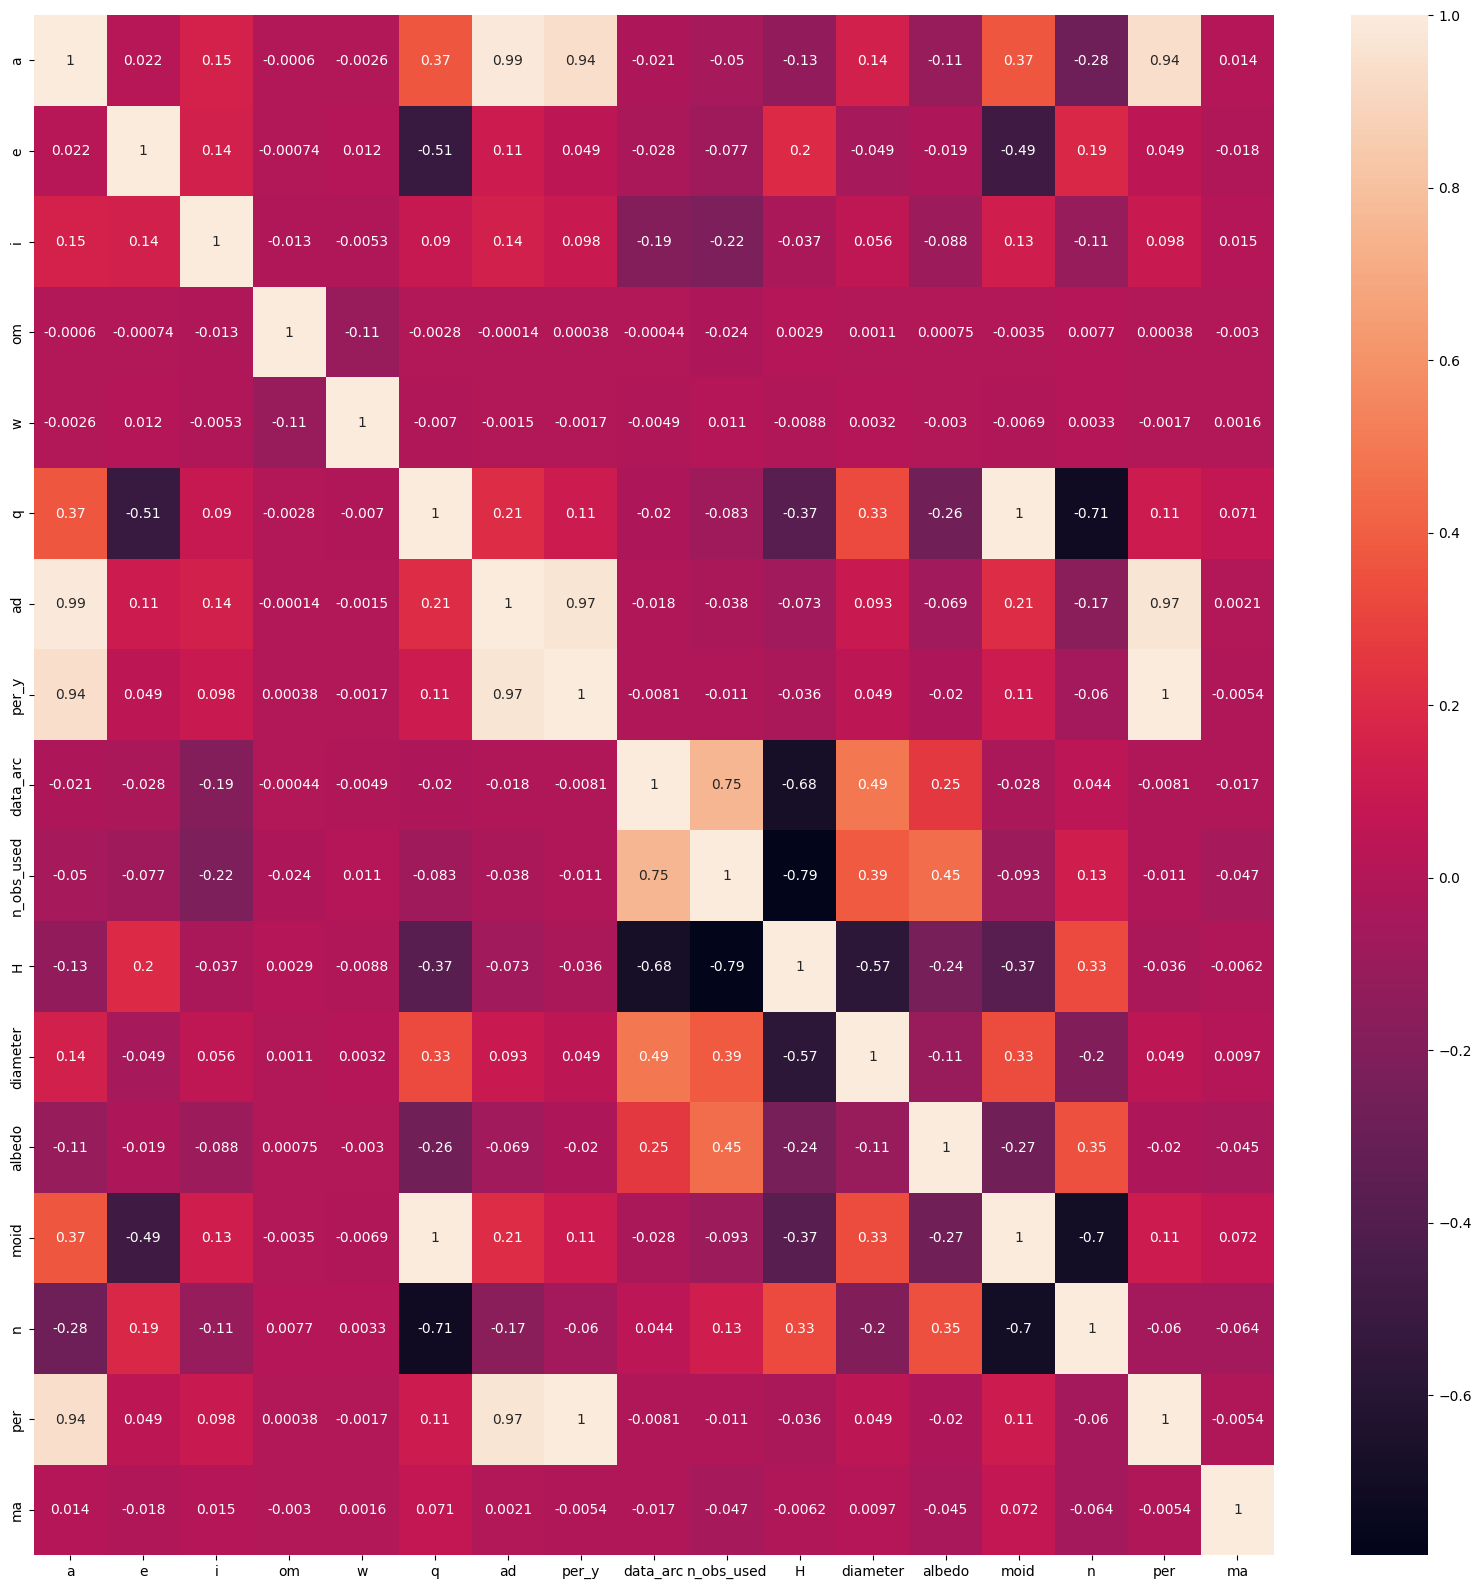

In [127]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: >

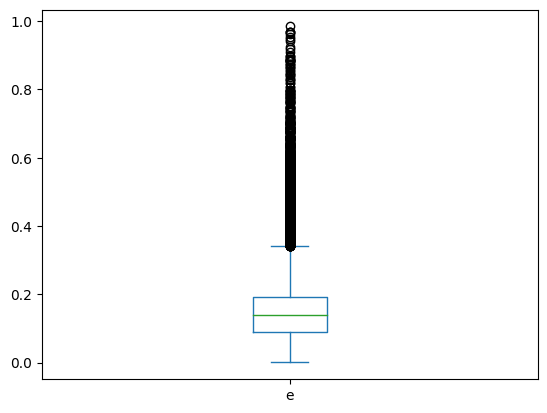

In [128]:
df.e.plot(kind="box")

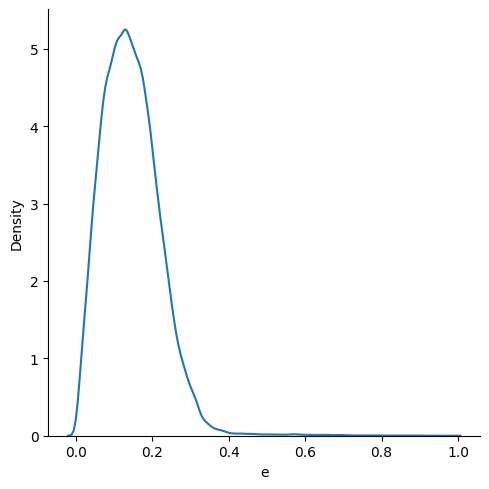

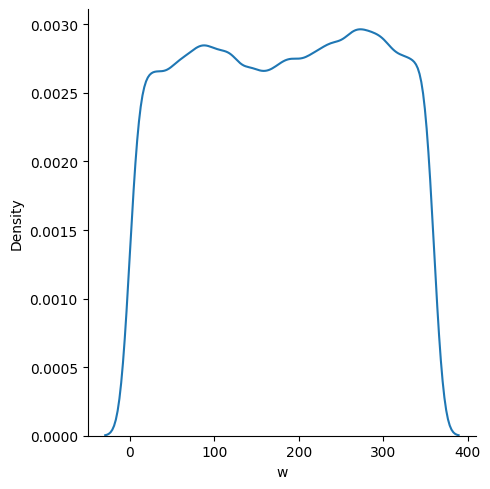

In [129]:
sns.displot(df,x='e',kind='kde')
sns.displot(df,x='w',kind='kde')

<AxesSubplot: xlabel='diameter', ylabel='n_obs_used'>

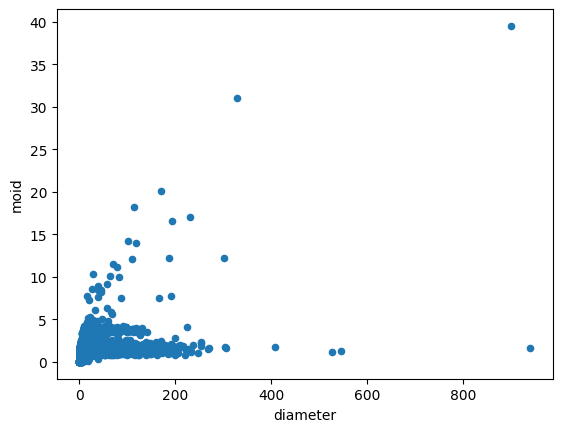

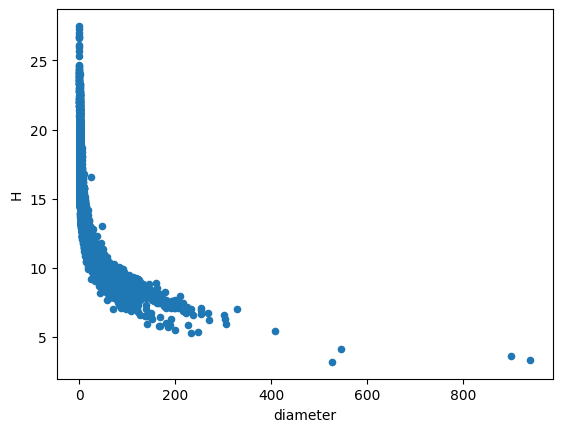

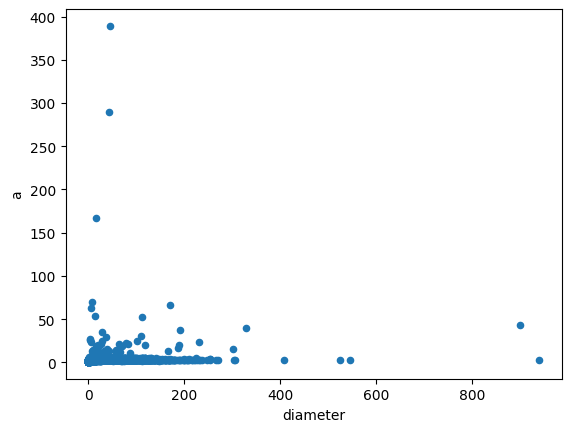

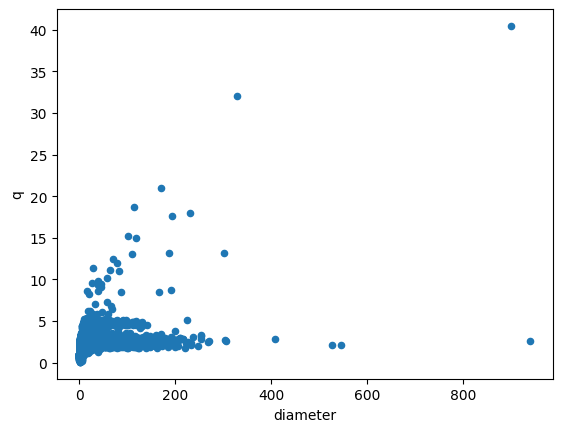

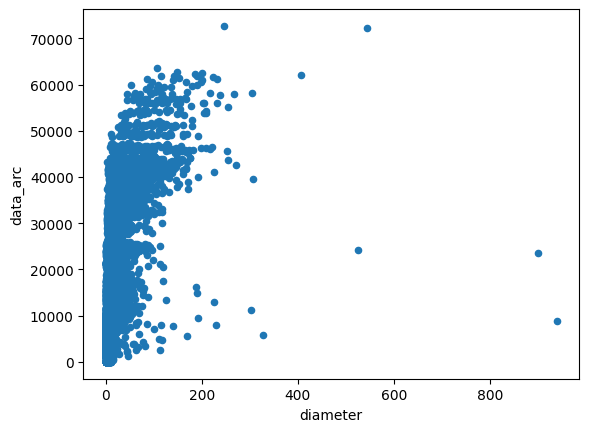

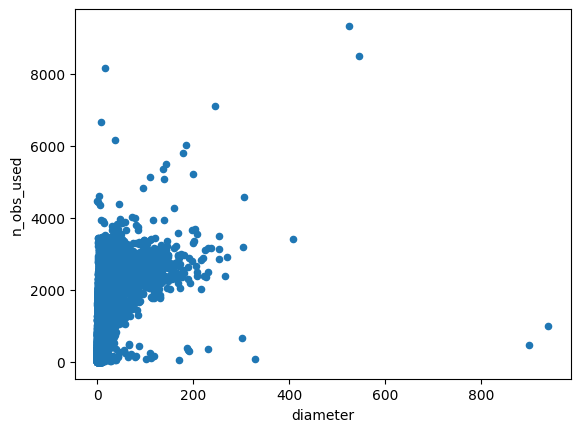

In [130]:
df.plot(kind = 'scatter', x = 'diameter', y = 'moid')
df.plot(kind = 'scatter', x = 'diameter', y = 'H')
df.plot(kind = 'scatter', x = 'diameter', y = 'a')
df.plot(kind = 'scatter', x = 'diameter', y = 'q')
df.plot(kind = 'scatter', x = 'diameter', y = 'data_arc')
df.plot(kind = 'scatter', x = 'diameter', y = 'n_obs_used')

In [131]:
o1=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [132]:
df['neo']=o1.fit_transform(df[['neo']])
df['pha']=o1.fit_transform(df[['pha']])

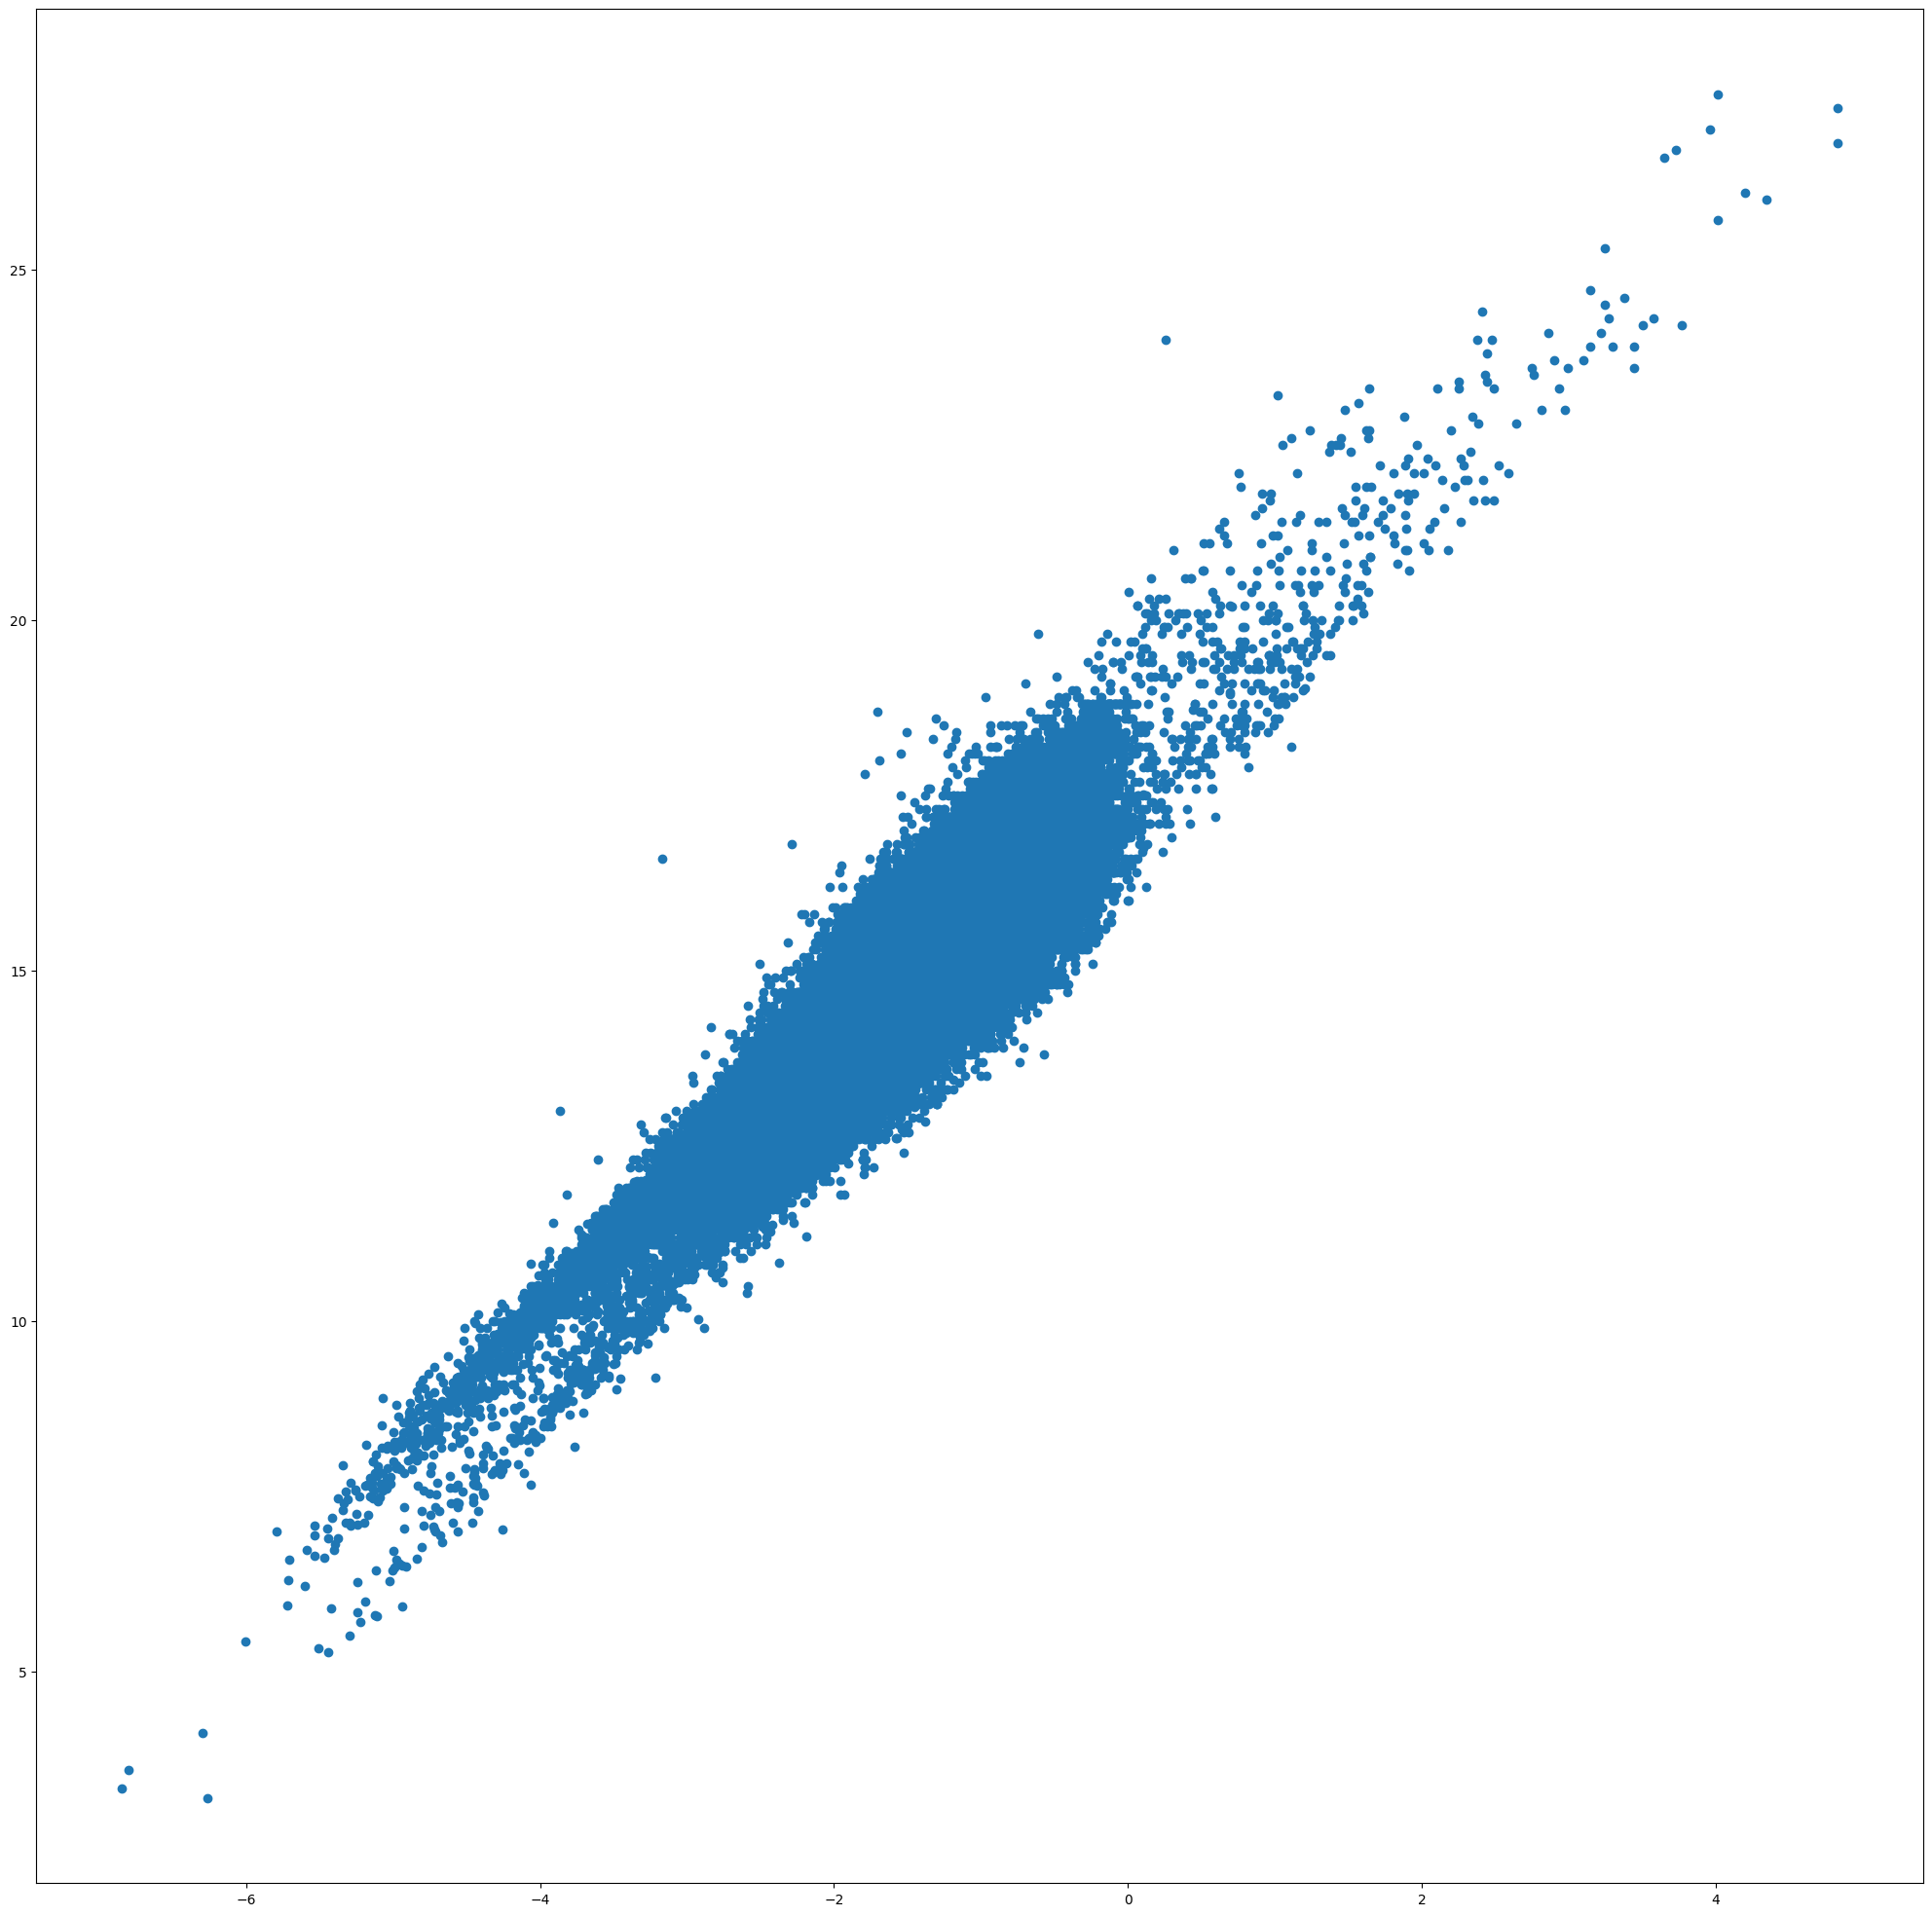

In [133]:
plt.figure(figsize=(25,25))
plt.scatter(-np.log(df['diameter']),df['H'])

<AxesSubplot: xlabel='diameter', ylabel='new_H'>

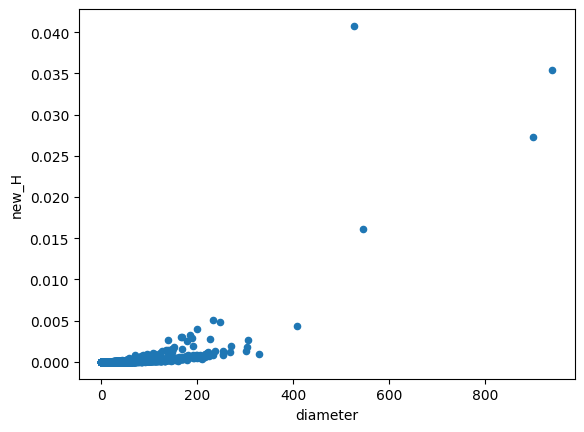

In [134]:
df=df.assign(new_H=lambda x: np.e**(-x.H))
df.plot(kind = 'scatter', x = 'diameter', y = 'new_H')

In [135]:
df.isna().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
neo           0
pha           0
diameter      0
albedo        0
moid          0
class         0
n             0
per           0
ma            0
new_H         0
dtype: int64

In [136]:
df.nunique()

a             136005
e             136005
i             136005
om            136005
w             136005
q             136005
ad            136005
per_y         136005
data_arc       18546
n_obs_used      3129
H                715
neo                2
pha                2
diameter       16596
albedo          1057
moid           94012
class             11
n             136005
per           136005
ma            136005
new_H            715
dtype: int64

# Data is ready for EDA
a- semi major axis

e-eccentricity

i- inclination with respect to x-y elliptical plane

om - longitude of the ascending node

w- argument of perihelion

q - perihelion distance

ad - aphelion distance

per_y - orbital period

data_Arc - data arc span(d)

condition_Code = orbit condition code

n_obs_used - number of observation used

H - absolute magnitude parameter

neo-Near earth object

pha - Physically hazardous object

diameter - diameter of asteroids

In [137]:
df[['a','diameter']].corr()

,a,diameter
a,1.0000,0.1445
diameter,0.1445,1.0000


In [138]:
df[['e','diameter']].corr()

,e,diameter
e,1.000000,-0.048628
diameter,-0.048628,1.000000


In [139]:
df[['i','diameter']].corr()

,i,diameter
i,1.000000,0.055954
diameter,0.055954,1.000000


In [140]:
df[['om','diameter']].corr()

,om,diameter
om,1.000000,0.001104
diameter,0.001104,1.000000


In [141]:
df[['w','diameter']].corr()

,w,diameter
w,1.000000,0.003155
diameter,0.003155,1.000000


In [142]:
df[['ad','diameter']].corr()

,ad,diameter
ad,1.000000,0.093346
diameter,0.093346,1.000000


In [143]:
df[['per_y','diameter']].corr()

,per_y,diameter
per_y,1.000000,0.048914
diameter,0.048914,1.000000


In [144]:
df[['data_arc','diameter']].corr()

,data_arc,diameter
data_arc,1.000000,0.492149
diameter,0.492149,1.000000


In [145]:
df[['q','diameter']].corr()

,q,diameter
q,1.00000,0.33008
diameter,0.33008,1.00000


### Till now, We have seen:
Diameter depends on

    a: semi major axis
    
    data_arc: data arc span(d)
    
    q: perihelion distance

Columns correlated till data_arc

In [146]:
# df[['condition_Code','diameter']].corr()

In [147]:
df[['n_obs_used','diameter']].corr()

,n_obs_used,diameter
n_obs_used,1.000000,0.385211
diameter,0.385211,1.000000


In [148]:
df[['H','diameter']].corr()

,H,diameter
H,1.000000,-0.569545
diameter,-0.569545,1.000000


In [149]:
df[['neo','diameter']].corr()

,neo,diameter
neo,1.00000,0.03535
diameter,0.03535,1.00000


In [150]:
df[['pha','diameter']].corr()

,pha,diameter
pha,1.000000,0.018864
diameter,0.018864,1.000000


In [151]:
df[['moid','diameter']].corr()

,moid,diameter
moid,1.00000,0.33283
diameter,0.33283,1.00000


In [152]:
df[['new_H','diameter']].corr()

,new_H,diameter
new_H,1.000000,0.526247
diameter,0.526247,1.000000


Diameter depends on a, data_arc, q, new_H, moid, H, n_obs_used

In [153]:
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,neo,pha,diameter,albedo,moid,class,n,per,ma,new_H
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,...,1.0,1.0,939.400,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096,0.035437
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,...,1.0,1.0,545.000,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133,0.016083
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,...,1.0,1.0,246.596,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016,0.004844
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,...,1.0,1.0,525.400,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936,0.040762
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,...,1.0,1.0,106.699,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289,0.001059


In [154]:
df.nunique()

a             136005
e             136005
i             136005
om            136005
w             136005
q             136005
ad            136005
per_y         136005
data_arc       18546
n_obs_used      3129
H                715
neo                2
pha                2
diameter       16596
albedo          1057
moid           94012
class             11
n             136005
per           136005
ma            136005
new_H            715
dtype: int64

In [155]:
df['new_H'].head(10)

0    0.035437
1    0.016083
2    0.004844
3    0.040762
4    0.001059
5    0.003313
6    0.004046
7    0.001519
8    0.001873
9    0.004383
Name: new_H, dtype: float64

In [156]:
df['H'].head(10)

0    3.34
1    4.13
2    5.33
3    3.20
4    6.85
5    5.71
6    5.51
7    6.49
8    6.28
9    5.43
Name: H, dtype: float64

new_H and H have only 763 unique values(< 1%), but they do not look like categorical values.
Hence we will not consider these parameters

In [157]:
df_corr = df.corr()

df_corr['diameter']

C:\Users\abhia\AppData\Local\Temp\ipykernel_8000\3656873661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


a             0.144500
e            -0.048628
i             0.055954
om            0.001104
w             0.003155
q             0.330080
ad            0.093346
per_y         0.048914
data_arc      0.492149
n_obs_used    0.385211
H            -0.569545
neo           0.035350
pha           0.018864
diameter      1.000000
albedo       -0.107944
moid          0.332830
n            -0.202887
per           0.048914
ma            0.009703
new_H         0.526247
Name: diameter, dtype: float64

Columns greater than 30% relation are
q, 
data_arc, 
n_obs_used, 
H, 
moid, 
new_H

Since neo and pha are categorical values we will consider these 2 columns

In [92]:
df = df[['q','data_arc','n_obs_used','moid','neo','pha','diameter']]

In [93]:
df

,q,data_arc,n_obs_used,moid,neo,pha,diameter
0,2.558684,8822.0,1002,1.594780,1.0,1.0,939.400
1,2.133865,72318.0,8490,1.233240,1.0,1.0,545.000
2,1.983332,72684.0,7104,1.034540,1.0,1.0,246.596
3,2.151909,24288.0,9325,1.139480,1.0,1.0,525.400
4,2.082324,63507.0,2916,1.095890,1.0,1.0,106.699
...,...,...,...,...,...,...,...
797835,1.797805,2250.0,47,0.854315,1.0,1.0,1.077
797860,2.666623,2373.0,50,1.663010,1.0,1.0,3.793
798077,2.354549,3297.0,33,1.367330,1.0,1.0,2.696
799752,2.174231,2208.0,27,1.166840,1.0,1.0,3.271


In [94]:
from sklearn.model_selection import train_test_split
predictors = df.drop('diameter',axis=1) 
target = df['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [104]:
#using StandardScaler for scaling numerical values as we have lot of outliers because using minmax scaling will 
    #crush our values to very small numbers as we have outliers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

In [105]:
# Using Regularised Linear Regressor

from sklearn.linear_model import ElasticNet 
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elastic_net.fit(X_train_std, Y_train)
Y_pred=elastic_net.predict(X_test_std)

print(mean_squared_error(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))

74.92259645779562
0.30138853880926364


In [111]:
from sklearn.model_selection import GridSearchCV

parametersGrid = {"max_iter": [10, 20, 30],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=10)
grid.fit(X_train_std, Y_train)
grid.best_params_


C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.484e+06, tolerance: 8.230e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.519e+06, tolerance: 8.198e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.480e+06, tolerance: 8.230e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.514e+06, tolerance: 8.198e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.515e+06, tolerance: 8.198e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+06, tolerance: 7.628e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.557e+06, tolerance: 8.333e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.611e+06, tolerance: 8.492e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.618e+06, tolerance: 8.542e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.581e+06, tolerance: 8.452e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.511e+06, tolerance: 8.198e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.361e+06, tolerance: 7.628e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.478e+06, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+06, tolerance: 8.333e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.361e+06, tolerance: 7.628e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.477e+06, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.619e+06, tolerance: 8.542e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e+06, tolerance: 8.452e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.569e+06, tolerance: 8.369e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.538e+06, tolerance: 8.323e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.357e+06, tolerance: 7.628e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.473e+06, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.602e+06, tolerance: 8.492e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.614e+06, tolerance: 8.542e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e+06, tolerance: 8.452e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.571e+06, tolerance: 8.369e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.520e+06, tolerance: 8.198e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e+06, tolerance: 7.628e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.481e+06, tolerance: 8.230e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.515e+06, tolerance: 8.198e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.601e+06, tolerance: 8.492e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.613e+06, tolerance: 8.542e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.463e+06, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.537e+06, tolerance: 8.333e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.559e+06, tolerance: 8.452e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.551e+06, tolerance: 8.369e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.512e+06, tolerance: 8.323e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.447e+06, tolerance: 8.230e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.576e+06, tolerance: 8.542e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.539e+06, tolerance: 8.452e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.426e+06, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.499e+06, tolerance: 8.333e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.484e+06, tolerance: 8.323e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.416e+06, tolerance: 8.230e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.511e+06, tolerance: 8.452e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.504e+06, tolerance: 8.369e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.473e+06, tolerance: 8.333e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.525e+06, tolerance: 8.492e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.422e+06, tolerance: 8.198e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.276e+06, tolerance: 7.628e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.591e+06, tolerance: 8.369e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.560e+06, tolerance: 8.323e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.631e+06, tolerance: 8.542e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.593e+06, tolerance: 8.452e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.367e+06, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.439e+06, tolerance: 8.333e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.275e+06, tolerance: 8.198e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.118e+06, tolerance: 7.628e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.290e+06, tolerance: 8.452e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.279e+06, tolerance: 8.369e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.084e+06, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.155e+06, tolerance: 8.333e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.139e+06, tolerance: 8.369e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.111e+06, tolerance: 8.323e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.061e+06, tolerance: 8.492e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.068e+06, tolerance: 8.542e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.862e+06, tolerance: 8.198e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.719e+06, tolerance: 7.628e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.706e+06, tolerance: 8.323e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.719e+06, tolerance: 8.230e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.647e+06, tolerance: 8.542e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.621e+06, tolerance: 8.452e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.403e+06, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.477e+06, tolerance: 8.333e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.615e+06, tolerance: 8.198e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.461e+06, tolerance: 7.628e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+06, tolerance: 7.628e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.604e+06, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.883e+02, tolerance: 8.369e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.462e+02, tolerance: 8.323e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.764e+02, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.612e+02, tolerance: 8.333e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.491e+03, tolerance: 8.323e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.291e+03, tolerance: 8.230e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.690e+03, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.833e+03, tolerance: 8.333e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+04, tolerance: 8.198e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.201e+03, tolerance: 7.628e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.932e+04, tolerance: 8.452e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.857e+04, tolerance: 8.369e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.112e+04, tolerance: 7.628e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.100e+04, tolerance: 8.137e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.045e+03, tolerance: 8.323e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.683e+04, tolerance: 8.230e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.693e+03, tolerance: 8.369e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.799e+03, tolerance: 8.323e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+04, tolerance: 8.542e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.243e+04, tolerance: 8.452e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.238e+06, tolerance: 8.492e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e+06, tolerance: 8.542e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.082e+03, tolerance: 8.230e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.708e+03, tolerance: 8.198e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.875e+06, tolerance: 8.198e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.613e+06, tolerance: 7.628e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+06, tolerance: 8.230e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.073e+06, tolerance: 8.198e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.158e+06, tolerance: 8.369e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.135e+06, tolerance: 8.323e+02 Linear regression models with null weight for the l1 regularization term are more efficiently 

{'alpha': 0.1, 'l1_ratio': 0.8, 'max_iter': 30}

In [112]:
# Using Regularised Linear Regressor

from sklearn.linear_model import ElasticNet 
elastic_net = ElasticNet(max_iter=30, alpha=0.1, l1_ratio=0.8) 
elastic_net.fit(X_train_std, Y_train)
Y_pred=elastic_net.predict(X_test_std)

print(mean_squared_error(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))

74.86755941335622
0.30190172857914954


C:\Users\abhia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.403e+03, tolerance: 9.189e+02
  model = cd_fast.enet_coordinate_descent(


C:\Users\abhia\AppData\Local\Temp\ipykernel_8000\2286139865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test.values,label='test values', ax=ax1)
C:\Users\abhia\AppData\Local\Temp\ipykernel_8000\2286139865.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_pred_lr ,label='prediction'

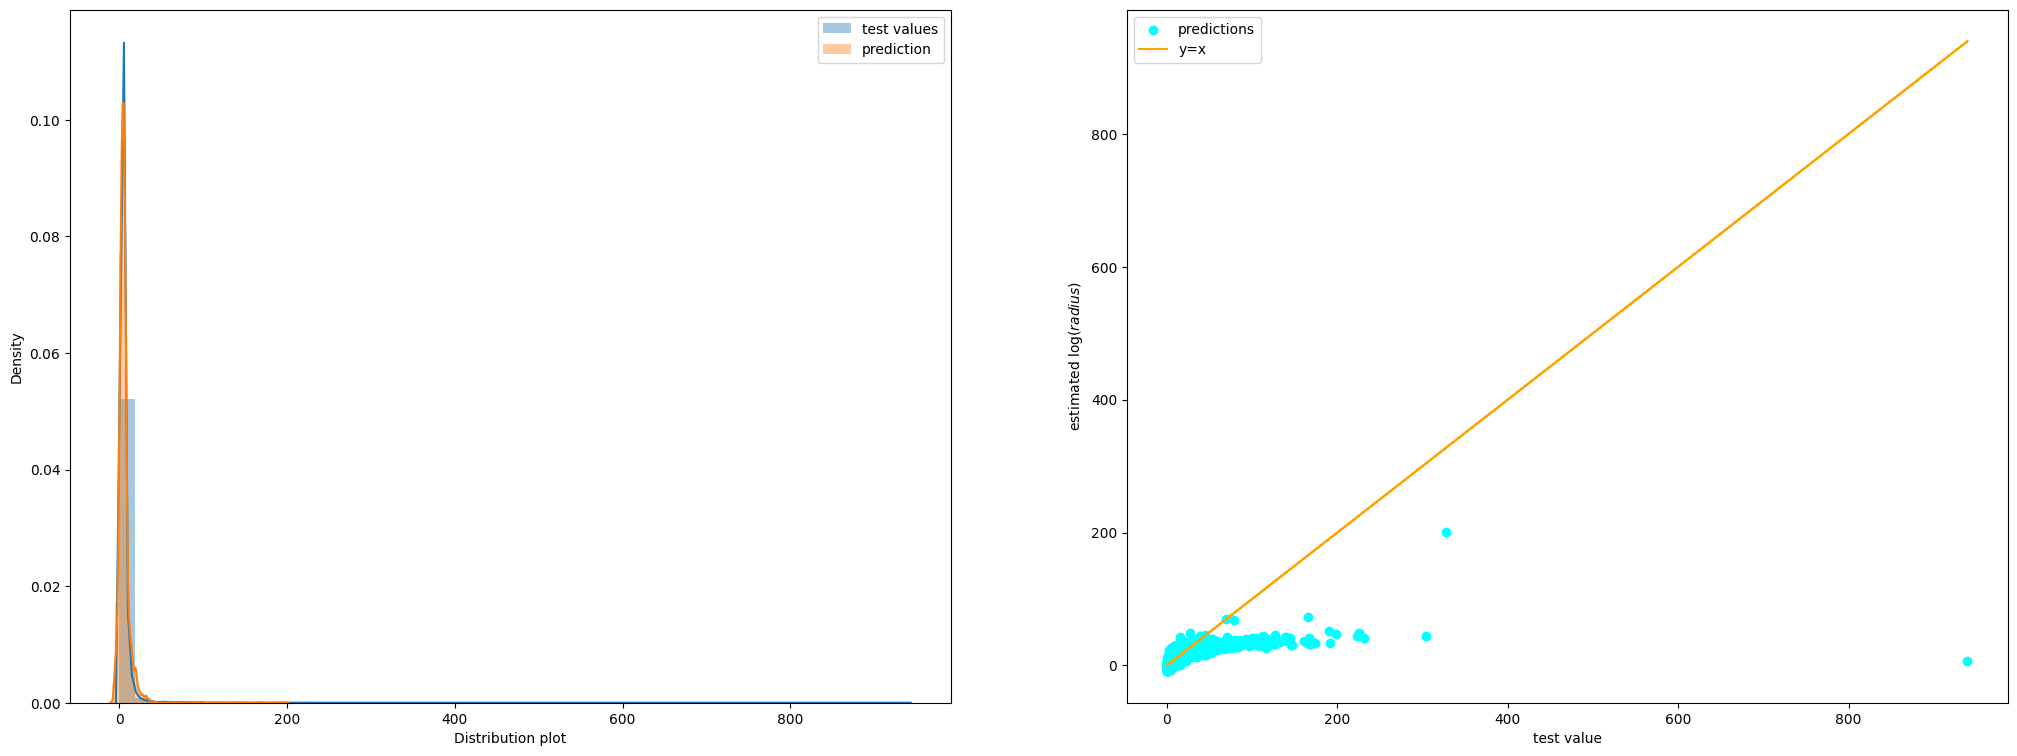

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_lr ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_lr, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

In [161]:
df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,neo,pha,diameter,albedo,moid,class,n,per,ma,new_H
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1002,...,1.0,1.0,939.400,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096,0.035437
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,8490,...,1.0,1.0,545.000,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133,0.016083
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,7104,...,1.0,1.0,246.596,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016,0.004844
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,9325,...,1.0,1.0,525.400,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936,0.040762
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,2916,...,1.0,1.0,106.699,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289,0.001059
